#### Libraries

In [ ]:
import pandas as pd
import os
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer 
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

#### Importing data

In [ ]:
new_list = []
topic_list = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Internship Project/bbc'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r', encoding='ISO-8859-1') as f:
                text = f.read()
                new_list.append(text)
            topic_list.append(f'{root}/{file}')

In [ ]:
data= pd.DataFrame(list(zip(new_list,topic_list)), columns=['text','topic'])
data['topic_extracted'] = data.topic.apply(lambda x : x.split('/')[-2])
data['file_name'] = data.topic.apply(lambda x : x.split('/')[-1])

In [ ]:
main_data = pd.DataFrame(list(zip(new_list,topic_list)), columns=['text','topic'])
main_data['topic_extracted'] = main_data.topic.apply(lambda x : x.split('/')[-2])
main_data.to_csv('/content/drive/MyDrive/Internship Project/bbc/main_data.csv', index = False)

Storing data as csv, for future iterations

In [ ]:
main_data = pd.read_csv('/content/drive/MyDrive/Internship Project/bbc/main_data.csv')

In [ ]:
main_data.head()

,text,topic,topic_extracted
0,Stars pay tribute to actor Davis\n\nHollywood ...,/content/drive/MyDrive/Internship Project/bbc/...,entertainment
1,Aviator 'creator' in Oscars snub\n\nThe man wh...,/content/drive/MyDrive/Internship Project/bbc/...,entertainment
2,De Niro film leads US box office\n\nFilm star ...,/content/drive/MyDrive/Internship Project/bbc/...,entertainment
3,Jarre joins fairytale celebration\n\nFrench mu...,/content/drive/MyDrive/Internship Project/bbc/...,entertainment
4,Neeson in bid to revive theatre\n\nHollywood f...,/content/drive/MyDrive/Internship Project/bbc/...,entertainment


In [ ]:
main_data.drop(columns='topic', inplace=True)

In [ ]:
duplicates=main_data.groupby('text').count()
duplicates[duplicates['topic_extracted']>1]
main_data[main_data['text'].isin(duplicates[duplicates['topic_extracted']>1].index)].head(5)

,text,topic_extracted
0,Stars pay tribute to actor Davis\n\nHollywood ...,entertainment
1,Aviator 'creator' in Oscars snub\n\nThe man wh...,entertainment
2,De Niro film leads US box office\n\nFilm star ...,entertainment
26,Singer's film to show at festival\n\nA documen...,entertainment
27,Prince crowned 'top music earner'\n\nPrince ea...,entertainment


In [ ]:
main_data.drop_duplicates(inplace=True)
main_data.head()

,text,topic_extracted
0,Stars pay tribute to actor Davis\n\nHollywood ...,entertainment
1,Aviator 'creator' in Oscars snub\n\nThe man wh...,entertainment
2,De Niro film leads US box office\n\nFilm star ...,entertainment
3,Jarre joins fairytale celebration\n\nFrench mu...,entertainment
4,Neeson in bid to revive theatre\n\nHollywood f...,entertainment


#### List of G_20 Countries

In [ ]:
g_20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 
'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States','European Union',
'England', 'Scotland', 'Wales','usa', 'us','uk','eu', 'cyprus', 'czech','south korea',
'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
g_20 = [i.lower() for i in g_20]


In [ ]:
main_data['text']=main_data['text'].str.lower()

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
main_data['col1']=main_data['text'].apply(lambda x: nlp(x))
main_data['col2']= main_data['col1'].apply(lambda x : [(part.text, part.label_) for part in x.ents])
main_data.head()

,text,topic_extracted,col1,col2
0,stars pay tribute to actor davis\n\nhollywood ...,entertainment,"(stars, pay, tribute, to, actor, davis, \n\n, ...","[(davis, PERSON), (hollywood, GPE), (spike lee..."
1,aviator 'creator' in oscars snub\n\nthe man wh...,entertainment,"(aviator, ', creator, ', in, oscars, snub, \n\...","[(oscars snub, GPE), (charles evans jr battled..."
2,de niro film leads us box office\n\nfilm star ...,entertainment,"(de, niro, film, leads, us, box, office, \n\n,...","[(de niro, PERSON), (us, GPE), (robert de niro..."
3,jarre joins fairytale celebration\n\nfrench mu...,entertainment,"(jarre, joins, fairytale, celebration, \n\n, f...","[(jarre joins, PERSON), (french, NORP), (jean-..."
4,neeson in bid to revive theatre\n\nhollywood f...,entertainment,"(neeson, in, bid, to, revive, theatre, \n\n, h...","[(neeson, ORG), (theatre, GPE), (hollywood, GP..."


In [ ]:
main_data['gpe']=main_data['col2'].apply(lambda x: list(set([i[0].lower() for i in x if i[1] == 'GPE' ])))
main_data['norp']= main_data['col2'].apply(lambda x: list(set([i[0].lower() for i in x if i[1] == 'NORP'])))
main_data.head()

,text,topic_extracted,col1,col2,gpe,norp
0,stars pay tribute to actor davis\n\nhollywood ...,entertainment,"(stars, pay, tribute, to, actor, davis, \n\n, ...","[(davis, PERSON), (hollywood, GPE), (spike lee...","[miami, florida, the united states, us, hollyw...",[]
1,aviator 'creator' in oscars snub\n\nthe man wh...,entertainment,"(aviator, ', creator, ', in, oscars, snub, \n\...","[(oscars snub, GPE), (charles evans jr battled...","[oscars snub, hollywood]",[chinese]
2,de niro film leads us box office\n\nfilm star ...,entertainment,"(de, niro, film, leads, us, box, office, \n\n,...","[(de niro, PERSON), (us, GPE), (robert de niro...",[us],[north american]
3,jarre joins fairytale celebration\n\nfrench mu...,entertainment,"(jarre, joins, fairytale, celebration, \n\n, f...","[(jarre joins, PERSON), (french, NORP), (jean-...","[copenhagen, denmark, us, manhattan, new york]","[french, christian, hans, hans christian, braz..."
4,neeson in bid to revive theatre\n\nhollywood f...,entertainment,"(neeson, in, bid, to, revive, theatre, \n\n, h...","[(neeson, ORG), (theatre, GPE), (hollywood, GP...","[new york's, northern ireland, â£8m, belfast, ...","[americans, irish, adrian]"


In [ ]:
main_data.drop(columns= ['col1','col2'], inplace=True)

In [ ]:
main_data['g_20_countries']= main_data['gpe'].apply(lambda x: [i for i in x if i in g_20])

In [ ]:
main_data.head()

,text,topic_extracted,gpe,norp,g_20_countries
0,stars pay tribute to actor davis\n\nhollywood ...,entertainment,"[miami, florida, the united states, us, hollyw...",[],[us]
1,aviator 'creator' in oscars snub\n\nthe man wh...,entertainment,"[oscars snub, hollywood]",[chinese],[]
2,de niro film leads us box office\n\nfilm star ...,entertainment,[us],[north american],[us]
3,jarre joins fairytale celebration\n\nfrench mu...,entertainment,"[copenhagen, denmark, us, manhattan, new york]","[french, christian, hans, hans christian, braz...","[denmark, us]"
4,neeson in bid to revive theatre\n\nhollywood f...,entertainment,"[new york's, northern ireland, â£8m, belfast, ...","[americans, irish, adrian]",[]


#### Number of articles for each individual country 

In [ ]:
single_countries = main_data[main_data['g_20_countries'].apply(lambda x: len(x) == 1)]
single_countries['g_20_countries']= single_countries['g_20_countries'].apply(lambda x: list(x)[0])

single_countries.groupby('g_20_countries').count().iloc[:,[1]].sort_values(by='topic_extracted', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,topic_extracted
g_20_countries,
us,265
uk,224
england,41
france,23
japan,23
india,22
germany,22
australia,20
scotland,20


#### Number of articles talking about several countries. 

In [ ]:
multiple_countries = main_data[main_data['g_20_countries'].apply(lambda x: len(x) > 1)]
multiple_countries['g_20_countries']='multiple'

multiple_countries.groupby('topic_extracted').count().iloc[:,[1]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gpe
topic_extracted,
business,180
entertainment,87
politics,110
sport,181
tech,96


#### Helper funs for extracting topics being talked about

In [ ]:
#Custom Regular Expression for word tokenization
import re

# Keep usernames together (any token starting with @, followed by A-Z, a-z, 0-9)
regexes=(r"(?:@[\w_]+)",

# Keep hashtags together (any token starting with #, followed by A-Z, a-z, 0-9, _, or -)
r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",

# Keep words with apostrophes, hyphens and underscores together
r"(?:[a-z][a-z’'\-_]+[a-z])",

# Keep all other sequences of A-Z, a-z, 0-9, _ together
r"(?:[\w_]+)",

# Everything else that's not whitespace
r"(?:\S)"
)

big_regex="|".join(regexes)

my_extensible_tokenizer = re.compile(big_regex, re.VERBOSE | re.I | re.UNICODE)

In [ ]:
def my_extensible_tokenize(data):
  exten_token=[]
  for i in range(len(main_data)):
    exten_token.append(my_extensible_tokenizer.findall(main_data.iloc[i,0]))
  return exten_token
exten_tokenop = my_extensible_tokenize(main_data)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer 

In [ ]:
def stemmer_token(data):
  stem=[]
  for i in range(len(data)):
    stemmer = PorterStemmer()
    stem.append([stemmer.stem(token) for token in data[i]])
  return stem

exten_stem = stemmer_token(exten_tokenop)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def lemmatizer_c(data):
  lemm=[]
  for i in range(len(data)):
    lemmatizer = WordNetLemmatizer()
    lemm.append([lemmatizer.lemmatize(token) for token in data[i]])
  return lemm

exten_lem=lemmatizer_c(exten_stem)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
stop = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stopwords(data):
  words = []
  for i in range (len(data)):
    words.append([token for token in data[i] if token not in stop])
  return words
exten_stop=stopwords(exten_lem)

In [ ]:
def case_folding(data):
  case_fold=[]
  for i in range (len(data)):
    case_fold.append([token.lower() for token in data[i]])
  return case_fold

exten_cf=case_folding(exten_stop)

In [ ]:
def dataframe(data):
  data=pd.DataFrame(" ".join(x) for x in data)
  return data
exten_final=dataframe(exten_cf)

In [ ]:
exten_final.rename(columns={exten_final.columns[0]: 'texts'}, inplace = True)
exten_final.head()

,texts
0,star pay tribut actor davi hollywood star incl...
1,aviat ' creator ' oscar snub man said got osca...
2,de niro film lead u box offic film star robert...
3,jarr join fairytal celebr french musician jean...
4,neeson bid reviv theatr hollywood film star li...


In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

In [ ]:
def topic_model(text, n_components = 5, tfidf = True, print_words = True, model_type = 'trunc', plott = 'True', subplot_dims = [4,3,10,10,10]):
  if tfidf:
    vectorizer = TfidfVectorizer(max_df=0.8, min_df=.1, stop_words='english')
    train_vectors = vectorizer.fit_transform(text)
  else:
    vectorizer = CountVectorizer(max_features=5000,analyzer='word', lowercase=False, strip_accents=None, binary=True)
    train_vectors = vectorizer.fit_transform(text).todense()

  if model_type == 'trunc':
    model = TruncatedSVD(n_components=n_components,random_state=42)
    model.fit(train_vectors)
    components = model.components_
  elif model_type == 'rsvd':
    u, s, components = randomized_svd(train_vectors,n_components=n_components)
  elif model_type == 'LDA':
    model = LatentDirichletAllocation(n_components=n_components,random_state=42)
    model.fit(train_vectors)
    components = model.components_

  if print_words:
    for index,topic in enumerate(components):
      print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
      print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
      print('\n')

  if plott:
    feature_names = np.array(vectorizer.get_feature_names())
    fig, axes = plt.subplots(subplot_dims[0], subplot_dims[1], figsize=(subplot_dims[2], subplot_dims[3]))
    for ax, coef in zip(axes.ravel(), components):
        plot_important_features(coef, feature_names, top_n=subplot_dims[4], ax=ax)
        
    plt.tight_layout()

#### Importing modules for topic modelling

In [ ]:
from sklearn.decomposition import TruncatedSVD, randomized_svd, LatentDirichletAllocation

### Tfidf

#### Truncated SVD

THE TOP 15 WORDS FOR TOPIC #0
['govern', 'world', 'time', 'film', 'play', 'say', 'use', 'new', 'peopl', 'game', 'thi', 'year', 'hi', 'mr', 'wa']


THE TOP 15 WORDS FOR TOPIC #1
['open', 'final', 'second', 'wa', 'team', 'england', 'match', 'star', 'player', 'best', 'hi', 'win', 'play', 'film', 'game']


THE TOP 15 WORDS FOR TOPIC #2
['team', 'told', 'match', 'play', 'england', 'campaign', 'leader', 'win', 'minist', 'wa', 'parti', 'elect', 'labour', 'hi', 'mr']


THE TOP 15 WORDS FOR TOPIC #3
['releas', 'produc', 'wa', 'parti', 'offic', 'british', 'music', 'elect', 'includ', 'labour', 'director', 'mr', 'best', 'star', 'film']


THE TOP 15 WORDS FOR TOPIC #4
['want', 'differ', 'develop', 'mani', 'way', 'like', 'make', 'work', 'film', 'servic', 'music', 'game', 'technolog', 'peopl', 'use']


THE TOP 15 WORDS FOR TOPIC #5
['cut', 'campaign', 'growth', 'share', 'expect', 'play', 'price', 'parti', 'market', 'sale', 'mr', 'labour', 'elect', 'film', 'game']


THE TOP 15 WORDS FOR TOPIC #6
['act

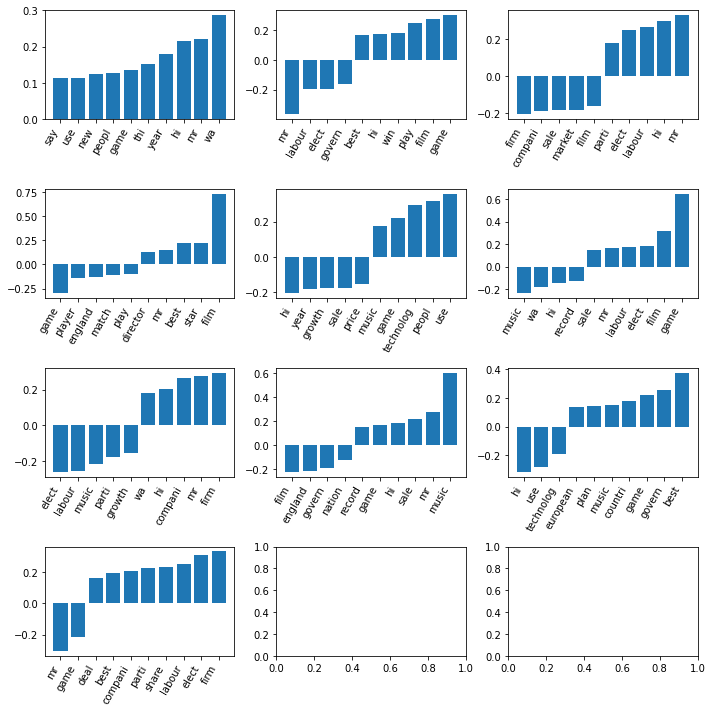

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = True, print_words = True, model_type = 'trunc', plott = 'True', subplot_dims = [4,3,10,10,10])

#### Randomized SVD

THE TOP 15 WORDS FOR TOPIC #0
['govern', 'world', 'time', 'film', 'play', 'say', 'use', 'new', 'peopl', 'game', 'thi', 'year', 'hi', 'mr', 'wa']


THE TOP 15 WORDS FOR TOPIC #1
['open', 'final', 'second', 'wa', 'team', 'england', 'match', 'star', 'player', 'best', 'hi', 'win', 'play', 'film', 'game']


THE TOP 15 WORDS FOR TOPIC #2
['team', 'told', 'match', 'play', 'england', 'campaign', 'leader', 'win', 'minist', 'wa', 'parti', 'elect', 'labour', 'hi', 'mr']


THE TOP 15 WORDS FOR TOPIC #3
['releas', 'produc', 'wa', 'parti', 'offic', 'british', 'music', 'elect', 'includ', 'labour', 'director', 'mr', 'best', 'star', 'film']


THE TOP 15 WORDS FOR TOPIC #4
['want', 'differ', 'develop', 'mani', 'way', 'like', 'make', 'work', 'film', 'servic', 'music', 'game', 'technolog', 'peopl', 'use']


THE TOP 15 WORDS FOR TOPIC #5
['cut', 'campaign', 'growth', 'share', 'play', 'expect', 'price', 'parti', 'market', 'sale', 'mr', 'labour', 'elect', 'film', 'game']


THE TOP 15 WORDS FOR TOPIC #6
['act

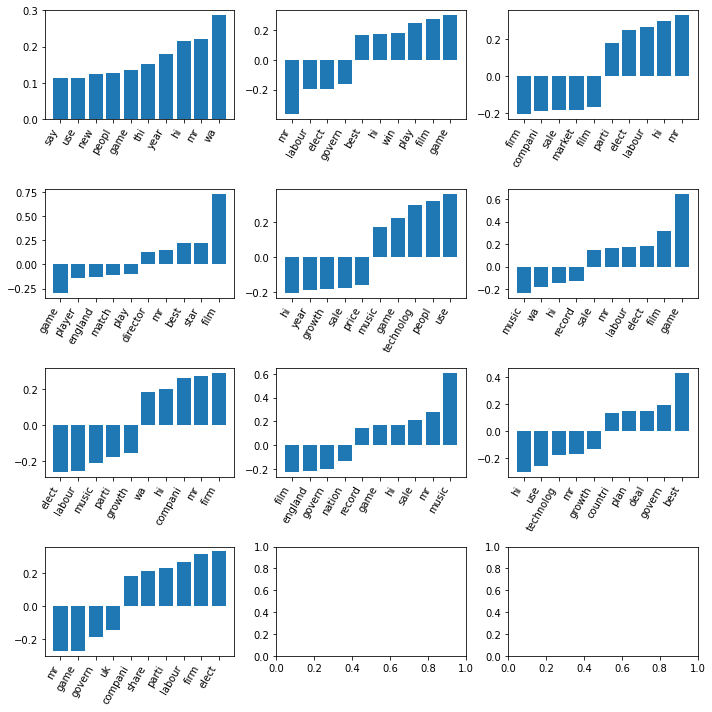

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = True, print_words = True, model_type = 'rsvd', plott = 'True', subplot_dims = [4,3,10,10,10])

#### LDA

THE TOP 15 WORDS FOR TOPIC #0
['minist', 'year', 'countri', 'secur', 'plan', 'new', 'work', 'uk', 'say', 'thi', 'govern', 'mr', 'wa', 'peopl', 'use']


THE TOP 15 WORDS FOR TOPIC #1
['industri', 'clear', 'level', 'control', 'parti', 'game', 'england', 'demand', 'player', 'problem', 'michael', 'concern', 'point', 'got', 'abl']


THE TOP 15 WORDS FOR TOPIC #2
['increas', '2005', 'demand', 'analyst', 'expect', 'trade', 'month', 'market', 'figur', 'year', 'rise', '2004', 'sale', 'price', 'growth']


THE TOP 15 WORDS FOR TOPIC #3
['sale', 'execut', 'govern', 'decis', 'state', 'face', 'unit', 'rule', 'firm', 'claim', 'wa', 'compani', 'case', 'charg', 'mr']


THE TOP 15 WORDS FOR TOPIC #4
['hit', 'new', 'world', 'uk', 'star', 'includ', 'number', 'perform', 'releas', 'best', 'year', 'hi', 'wa', 'record', 'music']


THE TOP 15 WORDS FOR TOPIC #5
['world', 'time', 'final', 'open', 'thi', 'year', 'team', 'match', 'england', 'win', 'player', 'play', 'wa', 'hi', 'game']


THE TOP 15 WORDS FOR TOPIC

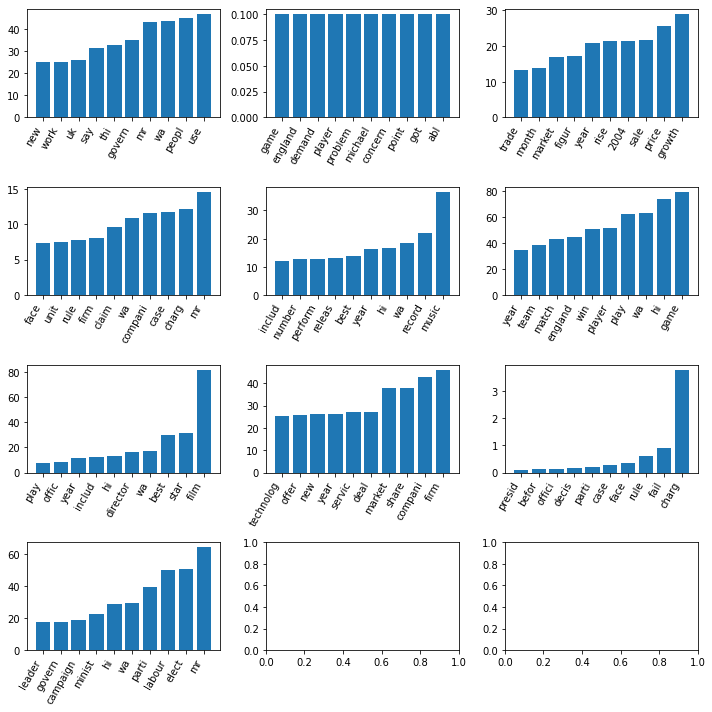

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = True, print_words = True, model_type = 'LDA', plott = 'True', subplot_dims = [4,3,10,10,10])

### Count Vectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=5000,analyzer='word', lowercase=False, strip_accents=None, binary=True)
exten_final_op = vectorizer.fit_transform(exten_final['texts']).todense()

#### Truncated SVD

THE TOP 15 WORDS FOR TOPIC #0
['say', 'make', 'last', 'could', 'time', 'new', 'hi', 'one', 'would', 'also', 'thi', 'year', 'wa', 'ha', 'said']


THE TOP 15 WORDS FOR TOPIC #1
['final', 'it', 'second', 'coach', 'best', 'side', 'old', 'team', 'match', 'first', 'player', 'game', 'hi', 'play', 'win']


THE TOP 15 WORDS FOR TOPIC #2
['told', 'secretari', 'conserv', 'claim', 'toni', 'mr', 'leader', 'blair', 'parti', 'torus', 'elect', 'govern', 'minist', 'labour', 'hi']


THE TOP 15 WORDS FOR TOPIC #3
['system', 'make', 'differ', 'websit', 'digit', 'want', 'like', 'comput', 'work', 'user', 'get', 'way', 'technolog', 'use', 'peopl']


THE TOP 15 WORDS FOR TOPIC #4
['oscar', 'wa', 'british', 'ha', 'director', 'uk', 'best', 'nomin', 'music', 'year', 'actor', 'includ', 'award', 'star', 'film']


THE TOP 15 WORDS FOR TOPIC #5
['predict', 'much', 'third', 'gener', 'increas', 'spend', 'figur', 'elect', 'growth', 'rate', 'labour', 'show', 'econom', 'economi', 'rise']


THE TOP 15 WORDS FOR TOPIC #6
[

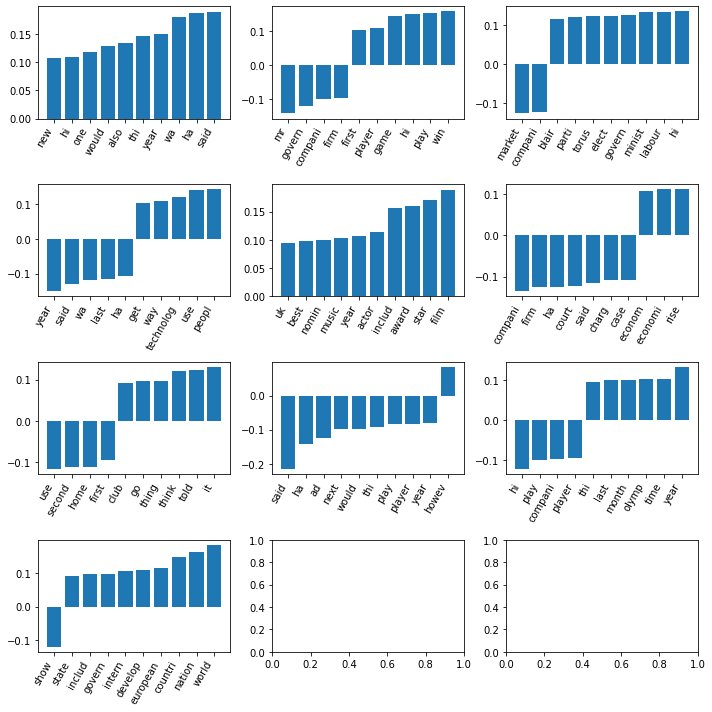

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = False, print_words = True, model_type = 'trunc', plott = 'True', subplot_dims = [4,3,10,10,10])

#### Randomized SVD

THE TOP 15 WORDS FOR TOPIC #0
['say', 'make', 'last', 'could', 'time', 'new', 'hi', 'one', 'would', 'also', 'thi', 'year', 'wa', 'ha', 'said']


THE TOP 15 WORDS FOR TOPIC #1
['final', 'it', 'second', 'coach', 'best', 'side', 'old', 'team', 'match', 'first', 'player', 'game', 'hi', 'play', 'win']


THE TOP 15 WORDS FOR TOPIC #2
['told', 'secretari', 'conserv', 'claim', 'toni', 'mr', 'leader', 'blair', 'parti', 'torus', 'elect', 'govern', 'minist', 'labour', 'hi']


THE TOP 15 WORDS FOR TOPIC #3
['system', 'make', 'differ', 'websit', 'digit', 'want', 'like', 'comput', 'work', 'user', 'get', 'way', 'technolog', 'use', 'peopl']


THE TOP 15 WORDS FOR TOPIC #4
['oscar', 'wa', 'british', 'ha', 'director', 'uk', 'best', 'nomin', 'music', 'year', 'actor', 'includ', 'award', 'star', 'film']


THE TOP 15 WORDS FOR TOPIC #5
['much', 'predict', 'third', 'gener', 'increas', 'spend', 'figur', 'elect', 'growth', 'rate', 'show', 'labour', 'econom', 'economi', 'rise']


THE TOP 15 WORDS FOR TOPIC #6
[

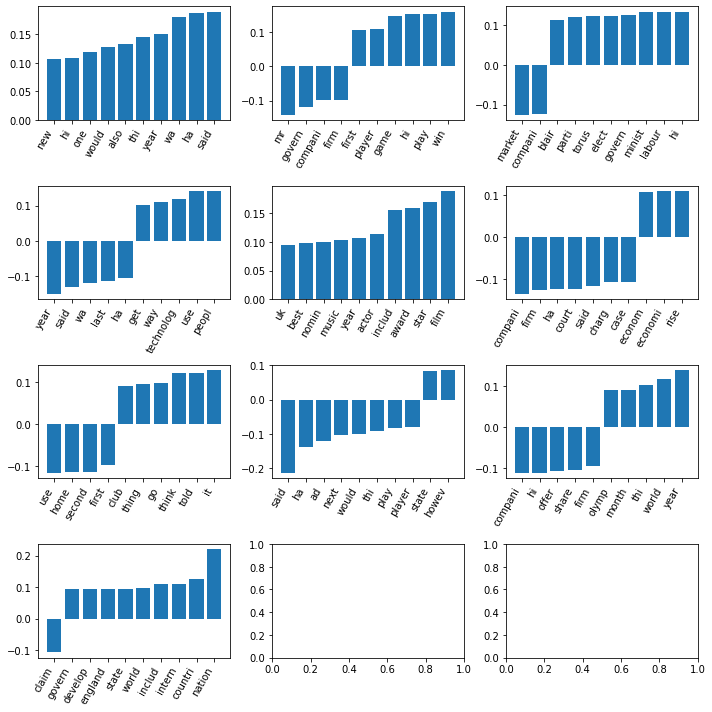

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = False, print_words = True, model_type = 'rsvd', plott = 'True', subplot_dims = [4,3,10,10,10])

#### LDA

THE TOP 15 WORDS FOR TOPIC #0
['increas', 'thi', 'economi', 'price', 'also', 'month', 'rise', 'expect', '2004', 'wa', 'growth', 'market', 'ha', 'said', 'year']


THE TOP 15 WORDS FOR TOPIC #1
['even', 'year', 'much', 'said', 'one', 'get', 'peopl', 'make', 'play', 'ha', 'thi', 'also', 'game', 'player', 'like']


THE TOP 15 WORDS FOR TOPIC #2
['mr', 'year', 'world', 'uk', 'hi', 'aid', 'thi', 'nation', 'wa', 'also', 'fund', 'would', 'countri', 'said', 'ha']


THE TOP 15 WORDS FOR TOPIC #3
['last', 'two', 'go', 'thi', 'first', 'back', 'year', 'player', 'win', 'ha', 'play', 'game', 'said', 'wa', 'hi']


THE TOP 15 WORDS FOR TOPIC #4
['one', 'last', 'includ', 'british', 'thi', 'win', 'said', 'film', 'also', 'award', 'star', 'ha', 'best', 'wa', 'year']


THE TOP 15 WORDS FOR TOPIC #5
['first', 'two', 'band', 'new', 'one', 'includ', 'also', 'star', 'releas', 'music', 'said', 'hi', 'year', 'ha', 'wa']


THE TOP 15 WORDS FOR TOPIC #6
['parti', 'even', 'told', 'labour', 'would', 'go', 'toni', 'sa

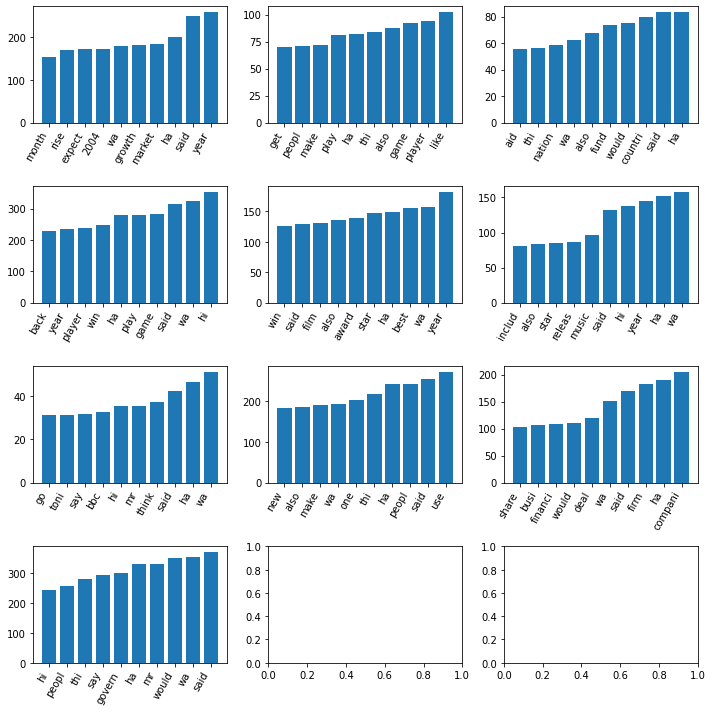

In [ ]:
topic_model(exten_final['texts'], n_components = 10, tfidf = False, print_words = True, model_type = 'LDA', plott = 'True', subplot_dims = [4,3,10,10,10])

### Topics talked about in each section

In [ ]:
main_data.reset_index(inplace = True)
main_data.drop(columns = ['index'], inplace = True)
exten_final[main_data['topic_extracted'] == 'business'].head()

,texts
1277,oil rebound weather effect oil price recov asi...
1278,saudi ministri employ woman woman employ saudi...
1279,tokyo say deflat ' control ' japanes govern ha...
1280,card fraudster ' target web ' new safeguard cr...
1281,korean credit card firm rescu south korea' lar...


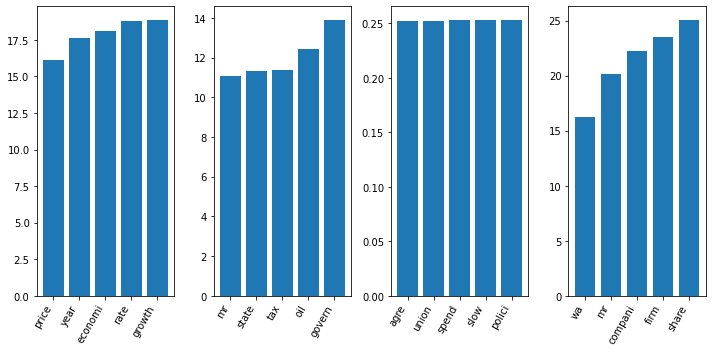

In [ ]:
topic_model(exten_final[main_data['topic_extracted']=='business']['texts'], n_components = 4, print_words=False, model_type = 'LDA',subplot_dims=[1,4,10,5,5] )

Topics found - National level topics, or general economics of a nation; state level govt; policies; company related docs.

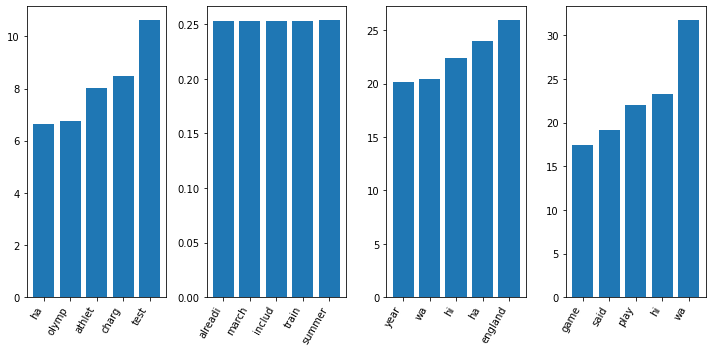

In [ ]:
topic_model(exten_final[main_data['topic_extracted']=='sport']['texts'], n_components = 4, print_words=False, model_type = 'LDA',subplot_dims=[1,4,10,5,5] )

1 major topic found - Olympics; 

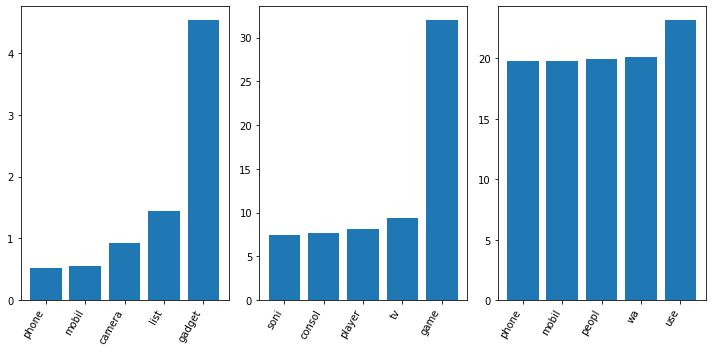

In [ ]:
topic_model(exten_final[main_data['topic_extracted']=='tech']['texts'], n_components = 3, print_words=False, model_type = 'LDA',subplot_dims=[1,3,10,5,5] )

Docs related to - Gadgets; consoles; cell phones;

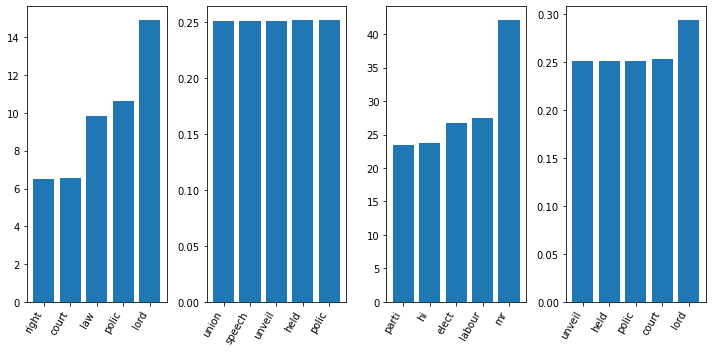

In [ ]:
topic_model(exten_final[main_data['topic_extracted']=='politics']['texts'], n_components = 4, print_words=False, model_type = 'LDA',subplot_dims=[1,4,10,5,5] )

Topics found - Law and order; Policies; Party dynamics

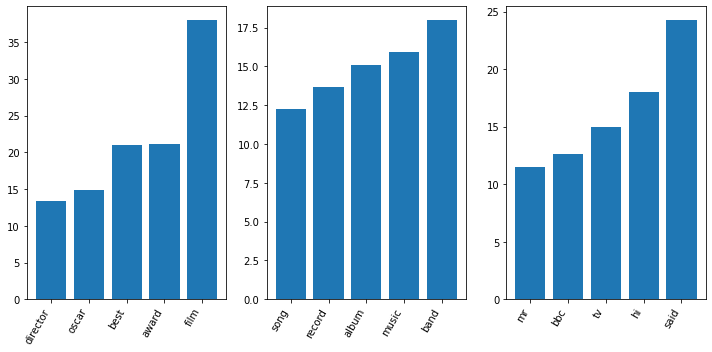

In [ ]:
topic_model(exten_final[main_data['topic_extracted']=='entertainment']['texts'], n_components = 3, print_words=False, model_type = 'LDA',subplot_dims=[1,3,10,5,5] )

Topics found - Movies; Music; Television